In [2]:
import warnings
warnings.filterwarnings("ignore")
import scanpy as sc
import anndata as ad
import pandas as pd
import seaborn as sns
import ptitprince as pt
import matplotlib.pyplot as plt

python(51041) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


In [27]:
# Load the h5ad file
data = sc.read("../data/merged_neu_with_blob.h5ad")

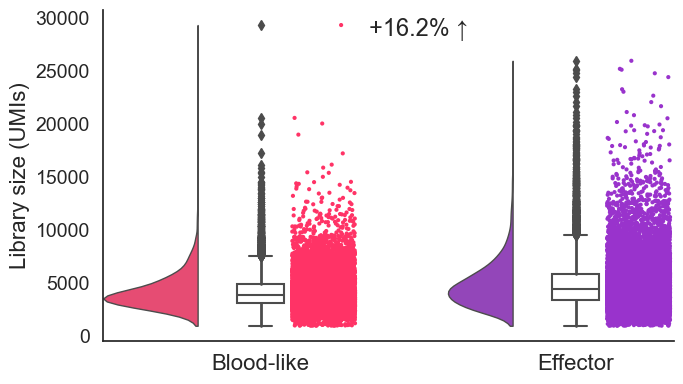

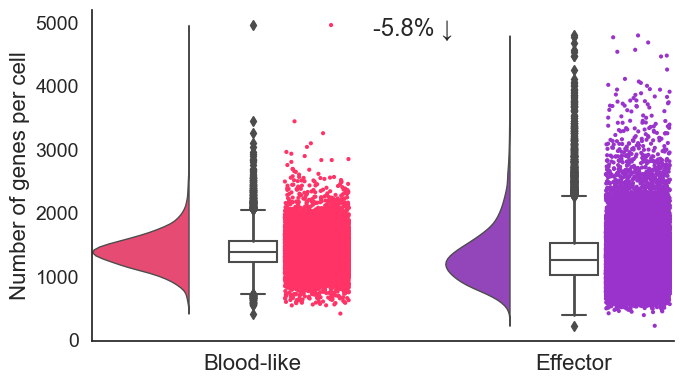

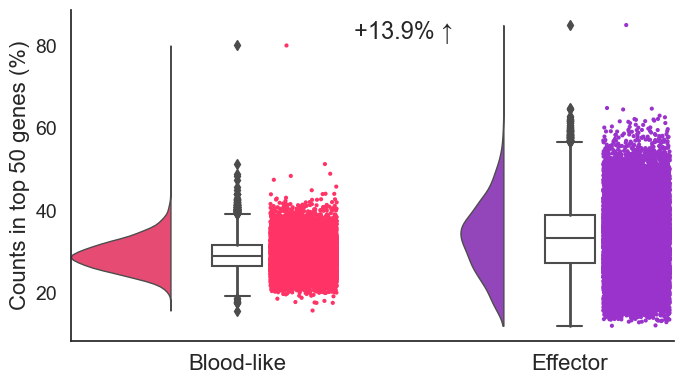

In [28]:
# Extract relevant columns into a DataFrame
df = data.obs[[
    'blob', 
    'total_counts', 
    'n_genes_by_counts', 
    'pct_counts_in_top_50_genes'
]].copy()

# Rename columns for clarity in plots
df = df.rename(columns={
    'total_counts': 'Library size (UMIs)',
    'n_genes_by_counts': 'Number of genes per cell',
    'pct_counts_in_top_50_genes': 'Counts in top 50 genes (%)'
})

# Define custom color palettes
palette = {
     "Blood-like": "#FF3366",
        "Effector": "#9933CC",
}

# Set plot style
sns.set(style="white")
# Function to make annotated raincloud plots
def plot_raincloud(data, y, title):
    f, ax = plt.subplots(figsize=(7, 4))
    
    # Plot raincloud
    pt.RainCloud(x='blob', y=y, data=data, palette=palette,
                 width_viol=.6, ax=ax, orient='v', move=0.2)
    
    # Style
    sns.despine(ax=ax)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('', fontsize=16)
    ax.set_ylabel(y, fontsize=16)
    ax.tick_params(axis='x', labelsize=16)
    ax.tick_params(axis='y', labelsize=14)

    # === Add % mean difference annotation ===
    means = data.groupby('blob')[y].mean()
    if len(means) == 2:
        group1, group2 = means.index
        mean1, mean2 = means[group1], means[group2]
        percent_diff = ((mean2 - mean1) / mean1) * 100
        label = f"{percent_diff:+.1f}% ↑" if percent_diff > 0 else f"{percent_diff:.1f}% ↓"
        
        # Centered annotation between violins
        ymin, ymax = ax.get_ylim()
        y_text = ymax * 0.92
        x_text = 0.5  # midpoint between violins
        
        ax.text(x_text, y_text, label, ha='center', fontsize=17)

    plt.tight_layout()
    plt.show()
# Plot for UMI counts
plot_raincloud(df, 'Library size (UMIs)', '')

# Plot for number of genes per cell
plot_raincloud(df, 'Number of genes per cell', '')

# Plot for % counts in top 50 genes
plot_raincloud(df, 'Counts in top 50 genes (%)', '')

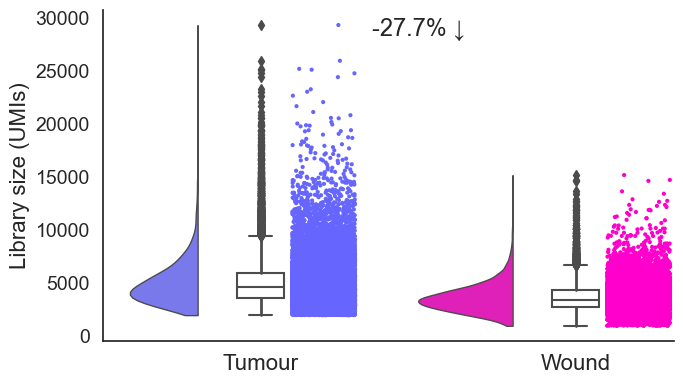

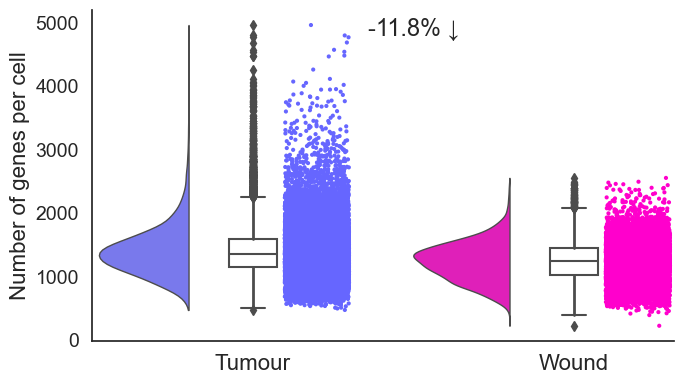

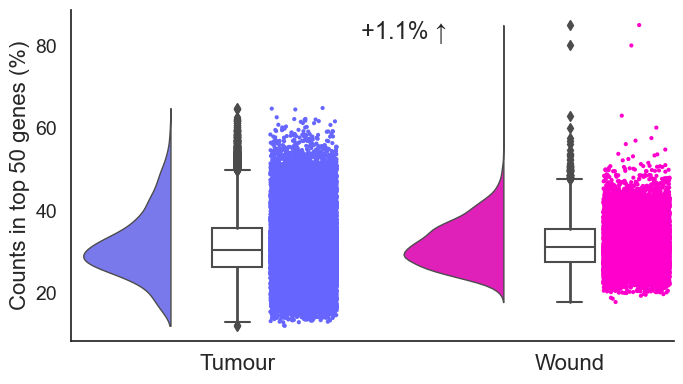

In [29]:

data = data[data.obs['sample'].isin(['Tumour', 'Wound'])]
# Extract relevant columns into a DataFrame
df = data.obs[[
    'sample',
    'blob',
    'total_counts', 
    'n_genes_by_counts', 
    'pct_counts_in_top_50_genes'
]].copy()

# Rename columns for clarity in plots
df = df.rename(columns={
    'total_counts': 'Library size (UMIs)',
    'n_genes_by_counts': 'Number of genes per cell',
    'pct_counts_in_top_50_genes': 'Counts in top 50 genes (%)'
})

# Define custom color palettes
palette = {"Tumour": "#6666FF", "Wound": "#FF00CC"}

# Set plot style
sns.set(style="white")

def plot_raincloud(data, y, title):
    f, ax = plt.subplots(figsize=(7, 4))
    
    # Plot raincloud
    pt.RainCloud(x='sample', y=y, data=data, palette=palette,
                 width_viol=.6, ax=ax, orient='v', move=0.2)
    
    # Style
    sns.despine(ax=ax)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('', fontsize=16)
    ax.set_ylabel(y, fontsize=16)
    ax.tick_params(axis='x', labelsize=16)
    ax.tick_params(axis='y', labelsize=14)

    # === Add % mean difference annotation ===
    means = data.groupby('sample')[y].mean()
    if len(means) == 2:
        group1, group2 = means.index
        mean1, mean2 = means[group1], means[group2]
        percent_diff = ((mean2 - mean1) / mean1) * 100
        label = f"{percent_diff:+.1f}% ↑" if percent_diff > 0 else f"{percent_diff:.1f}% ↓"
        
        # Centered annotation between violins
        ymin, ymax = ax.get_ylim()
        y_text = ymax * 0.92
        x_text = 0.5  # midpoint between violins
        
        ax.text(x_text, y_text, label, ha='center', fontsize=17)

    plt.tight_layout()
    plt.show()
# Plot for UMI counts
plot_raincloud(df, 'Library size (UMIs)', '')

# Plot for number of genes per cell
plot_raincloud(df, 'Number of genes per cell', '')

# Plot for % counts in top 50 genes
plot_raincloud(df, 'Counts in top 50 genes (%)', '')

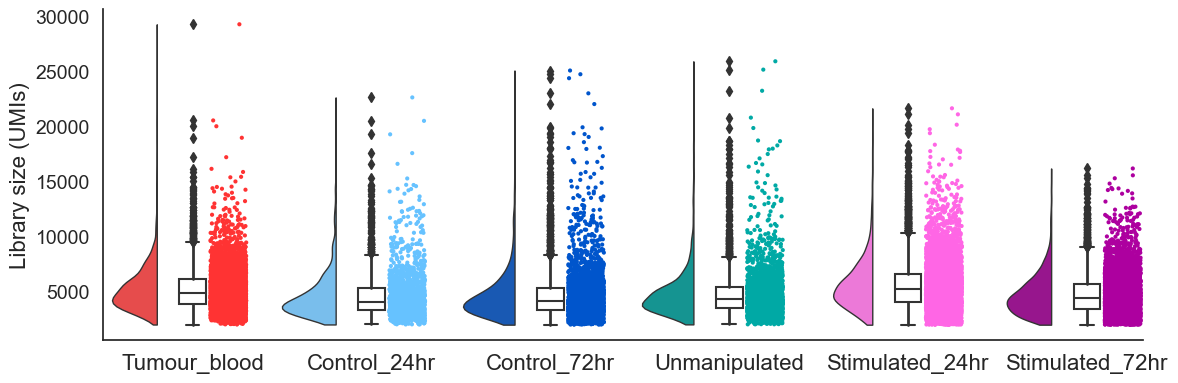

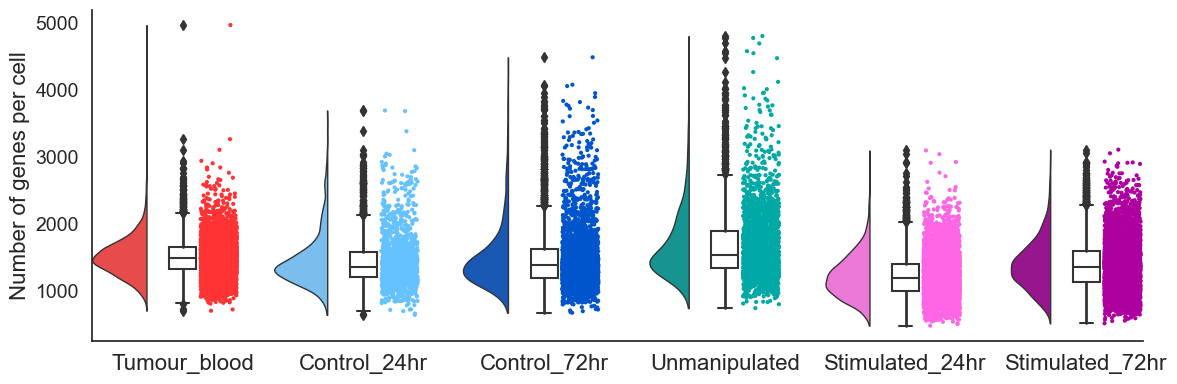

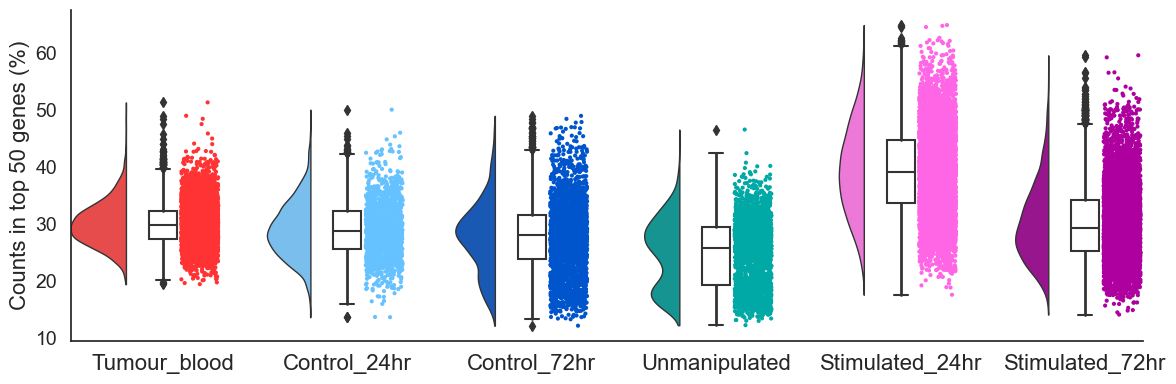

In [33]:
data = data[data.obs['batch'].isin([ 'Control_24hr','Control_72hr','Stimulated_24hr','Stimulated_72hr','Unmanipulated','Tumour_blood'])]
# Extract relevant columns into a DataFrame
df = data.obs[[
    'batch',
    'blob',
    'total_counts', 
    'n_genes_by_counts', 
    'pct_counts_in_top_50_genes'
]].copy()

# Rename columns for clarity in plots
df = df.rename(columns={
    'total_counts': 'Library size (UMIs)',
    'n_genes_by_counts': 'Number of genes per cell',
    'pct_counts_in_top_50_genes': 'Counts in top 50 genes (%)'
})

# Define custom color palettes
palette = {
    "Control_24hr":     "#66C2FF",  # light electric blue
    "Control_72hr":     "#0055CC",  # strong royal blue
    "Stimulated_24hr":  "#FF66E5",  # light vivid magenta
    "Stimulated_72hr":  "#AD009F",  # deep magenta
    "Unmanipulated":    "#00A9A5",  # teal
    "Tumour_blood":     "#FF3333",  # bright scarlet red
}

# Set plot style
sns.set(style="white")

def plot_raincloud(data, y, title):
    f, ax = plt.subplots(figsize=(12, 4))
    
    # Plot raincloud
    pt.RainCloud(x='batch', y=y, data=data, palette=palette,
                 width_viol=.6, ax=ax, orient='v', move=0.2)
    
    # Style
    sns.despine(ax=ax)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('', fontsize=16)
    ax.set_ylabel(y, fontsize=16)
    ax.tick_params(axis='x', labelsize=16)
    ax.tick_params(axis='y', labelsize=14)

    # === Add % mean difference annotation ===
    means = data.groupby('batch')[y].mean()
    if len(means) == 2:
        group1, group2 = means.index
        mean1, mean2 = means[group1], means[group2]
        percent_diff = ((mean2 - mean1) / mean1) * 100
        label = f"{percent_diff:+.1f}% ↑" if percent_diff > 0 else f"{percent_diff:.1f}% ↓"
        
        # Centered annotation between violins
        ymin, ymax = ax.get_ylim()
        y_text = ymax * 0.92
        x_text = 0.5  # midpoint between violins
        
        ax.text(x_text, y_text, label, ha='center', fontsize=17)

    plt.tight_layout()
    plt.show()
# Plot for UMI counts
plot_raincloud(df, 'Library size (UMIs)', '')

# Plot for number of genes per cell
plot_raincloud(df, 'Number of genes per cell', '')

# Plot for % counts in top 50 genes
plot_raincloud(df, 'Counts in top 50 genes (%)', '')

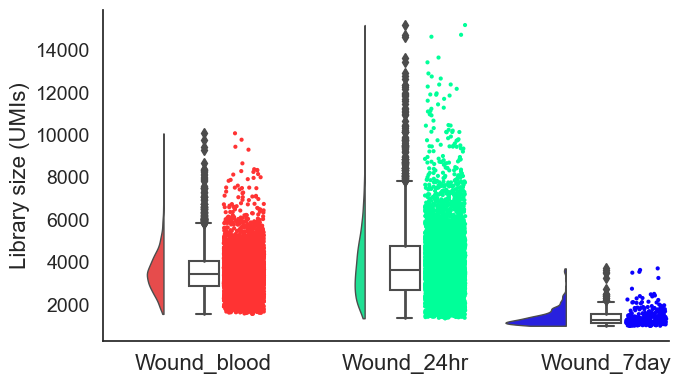

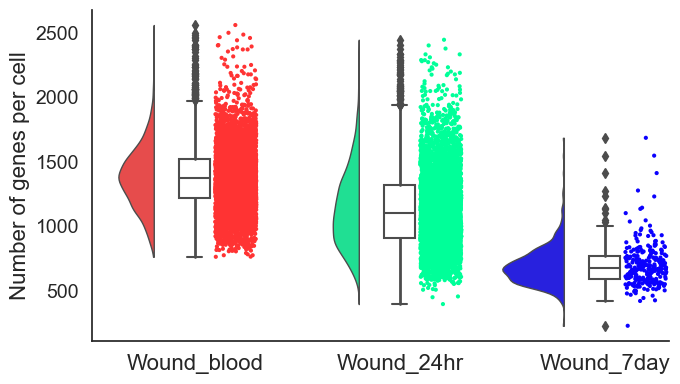

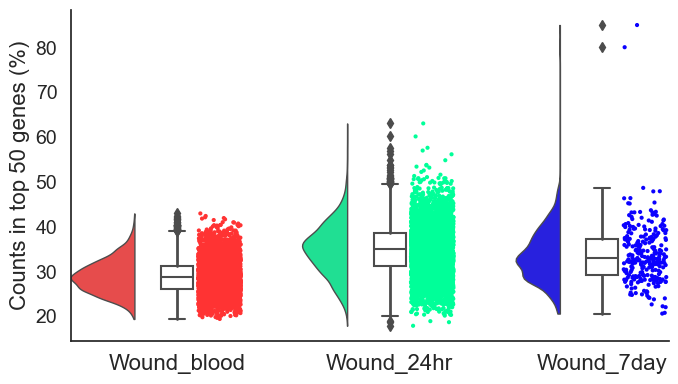

In [34]:
# Load the h5ad file
data = sc.read("../data/merged_neu_with_blob.h5ad")
data = data[data.obs['time_point'].isin([ 'Wound_24hr','Wound_7day','Wound_blood'])]
# Extract relevant columns into a DataFrame
df = data.obs[[
    'time_point',
    'blob',
    'total_counts', 
    'n_genes_by_counts', 
    'pct_counts_in_top_50_genes'
]].copy()

# Rename columns for clarity in plots
df = df.rename(columns={
    'total_counts': 'Library size (UMIs)',
    'n_genes_by_counts': 'Number of genes per cell',
    'pct_counts_in_top_50_genes': 'Counts in top 50 genes (%)'
})

# Define custom color palettes
palette = {"Wound_24hr": "#00FF99", "Wound_7day":"#0B01FE" , "Wound_blood": "#FF3333"}

# Set plot style
sns.set(style="white")

def plot_raincloud(data, y, title):
    f, ax = plt.subplots(figsize=(7, 4))
    
    # Plot raincloud
    pt.RainCloud(x='time_point', y=y, data=data, palette=palette,
                 width_viol=.6, ax=ax, orient='v', move=0.2)
    
    # Style
    sns.despine(ax=ax)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('', fontsize=16)
    ax.set_ylabel(y, fontsize=16)
    ax.tick_params(axis='x', labelsize=16)
    ax.tick_params(axis='y', labelsize=14)

    # === Add % mean difference annotation ===
    means = data.groupby('time_point')[y].mean()
    if len(means) == 2:
        group1, group2 = means.index
        mean1, mean2 = means[group1], means[group2]
        percent_diff = ((mean2 - mean1) / mean1) * 100
        label = f"{percent_diff:+.1f}% ↑" if percent_diff > 0 else f"{percent_diff:.1f}% ↓"
        
        # Centered annotation between violins
        ymin, ymax = ax.get_ylim()
        y_text = ymax * 0.92
        x_text = 0.5  # midpoint between violins
        
        ax.text(x_text, y_text, label, ha='center', fontsize=17)

    plt.tight_layout()
    plt.show()
# Plot for UMI counts
plot_raincloud(df, 'Library size (UMIs)', '')

# Plot for number of genes per cell
plot_raincloud(df, 'Number of genes per cell', '')

# Plot for % counts in top 50 genes
plot_raincloud(df, 'Counts in top 50 genes (%)', '')

In [7]:
print(df["time_point"].value_counts(dropna=False))
print(df[["Library size (UMIs)", "Number of genes per cell", "Counts in top 50 genes (%)"]].describe())

time_point
Wound_blood    5338
Wound_24hr     5325
Wound_7day      260
Name: count, dtype: int64
       Library size (UMIs)  Number of genes per cell  \
count         10923.000000              10923.000000   
mean           3648.043944               1243.169642   
std            1386.729268                305.385877   
min            1002.000000                231.000000   
25%            2730.000000               1025.500000   
50%            3466.000000               1254.000000   
75%            4324.000000               1448.500000   
max           15182.000000               2559.000000   

       Counts in top 50 genes (%)  
count                10923.000000  
mean                    31.950848  
std                      5.658677  
min                     17.899918  
25%                     27.719960  
50%                     31.273408  
75%                     35.682092  
max                     85.023772  


In [23]:
data = sc.read("../scripts/wound_with_clusternames.h5ad")

In [24]:
data.obs.columns

Index(['time_point', 'n_genes_by_counts', 'log1p_n_genes_by_counts',
       'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes',
       'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes',
       'pct_counts_in_top_500_genes', 'total_counts_mt',
       'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo',
       'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb',
       'log1p_total_counts_hb', 'pct_counts_hb', 'n_counts', 'n_genes',
       'doublet_scores', 'predicted_doublets', 'leiden', 'cell_type'],
      dtype='object')

In [25]:
print(data.obs['time_point'])
print(data.obs['cell_type'])

Wound_56_1           24hr
Wound_65_1           24hr
Wound_67_1           24hr
Wound_413_1          24hr
Wound_420_1          24hr
                    ...  
Wound_56538996_2    Blood
Wound_56550234_2    Blood
Wound_56576762_2    Blood
Wound_56604727_2    Blood
Wound_56616476_2    Blood
Name: time_point, Length: 11036, dtype: category
Categories (3, object): ['24hr', '7day', 'Blood']
Wound_56_1          Neutrophils
Wound_65_1          Neutrophils
Wound_67_1          Neutrophils
Wound_413_1         Neutrophils
Wound_420_1         Neutrophils
                       ...     
Wound_56538996_2    Neutrophils
Wound_56550234_2    Neutrophils
Wound_56576762_2    Neutrophils
Wound_56604727_2    Neutrophils
Wound_56616476_2    Neutrophils
Name: cell_type, Length: 11036, dtype: category
Categories (1, object): ['Neutrophils']


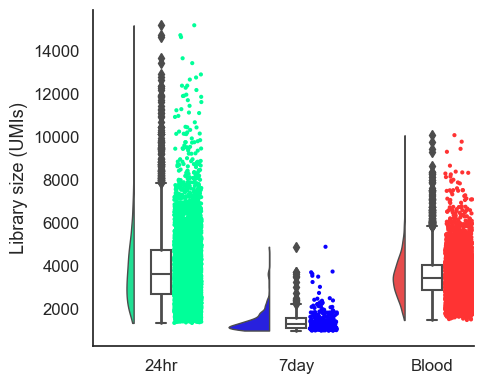

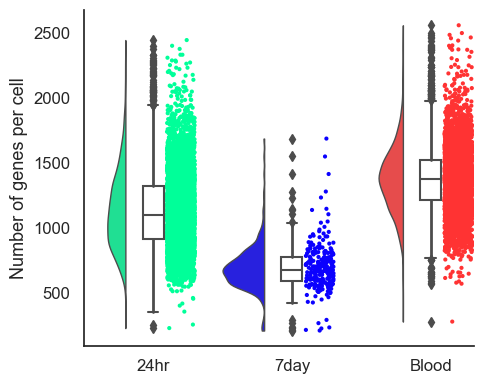

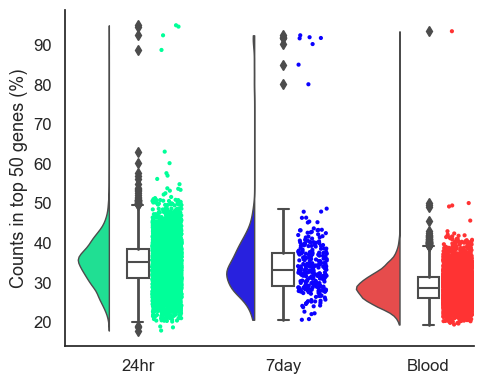

In [26]:
data = data[data.obs['time_point'].isin([ '24hr','7day','Blood'])]
# Extract relevant columns into a DataFrame
df = data.obs[[
    'time_point',
    'cell_type',
    'total_counts', 
    'n_genes_by_counts', 
    'pct_counts_in_top_50_genes'
]].copy()

# Rename columns for clarity in plots
df = df.rename(columns={
    'total_counts': 'Library size (UMIs)',
    'n_genes_by_counts': 'Number of genes per cell',
    'pct_counts_in_top_50_genes': 'Counts in top 50 genes (%)'
})

# Define custom color palettes
palette = {"24hr": "#00FF99", "7day":"#0B01FE" , "Blood": "#FF3333"}

# Set plot style
sns.set(style="white")

# Function to make raincloud plots
def plot_raincloud(data, y, title):
    f, ax = plt.subplots(figsize=(5, 4))
    pt.RainCloud(x='time_point', y=y, data=data, palette=palette,
                 width_viol=.6, ax=ax, orient='v', move=0.2)
    sns.despine(ax=ax)
    ax.set_title(title, fontsize=13)
    ax.set_xlabel('', fontsize=13)
    ax.set_ylabel(y, fontsize=13)
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    plt.tight_layout()
    plt.show()

# Plot for UMI counts
plot_raincloud(df, 'Library size (UMIs)', '')

# Plot for number of genes per cell
plot_raincloud(df, 'Number of genes per cell','')

# Plot for % counts in top 50 genes
plot_raincloud(df, 'Counts in top 50 genes (%)','')
